## 1. Binary Classification on Text Data: NLP with Disaster Tweets

## (a) Download the data
Download the training and test data from Kaggle, and answer the following questions: (1) how many training and test data points are there? and (2) what percentage of the training tweets are of real disasters, and what percentage is not? Note that the meaning of each column is explained in the data description on Kaggle.

(1) There are 7613 data points in the training dataset, and 3263 data points in the test dataset. 

(2) 42.97% of the training tweets are of real disasters, 57.03% is not. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
# stop showing warning:
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('nlp-getting-started/train.csv')
test_data = pd.read_csv('nlp-getting-started/test.csv')
train_data.head()
#train_data.shape
#test_data.shape

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
#test_data.head()


In [4]:
# check the number of 1 and 0 in target in train_data:
train_data.target.value_counts()
# count the percentage of 1 and 0 in target in train_data:
train_data.target.value_counts(normalize=True).round(4)


target
0    0.5703
1    0.4297
Name: proportion, dtype: float64

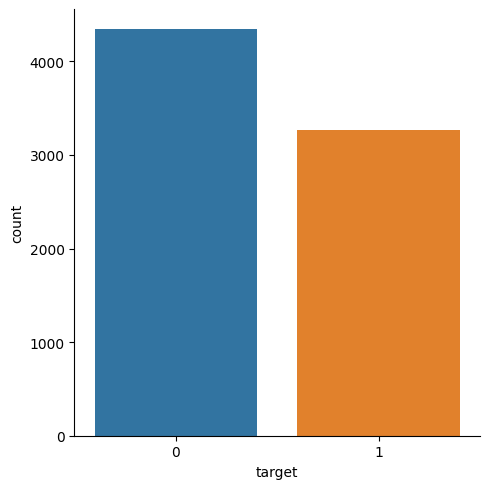

In [5]:
# how many tweets about disaster is actually a disaster
sns.catplot(data=train_data, x="target", kind="count")

In [6]:
# keep only the text and target columns in train_data:
train_data = train_data[['text','target']]
train_data.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


## (b) Split the training data

In [7]:
# Split the training data into training and development sets:
# 70% of the data points in the training data as the training set, and the remaining 30% of the data as the development set

from sklearn.model_selection import train_test_split

# Splitting the data into training and development sets
train, dev = train_test_split(train_data, test_size=0.3, random_state=12)

# check the shape of the training and development sets:
train.head()


,text,target
1103,On 1st August #Turkish jets bombed the village...,1
730,@Uptown_Jorge head up like yo nose bleeding,0
5106,Fukushima: The Story of a Nuclear Disaster htt...,1
3205,@TfLBusAlerts @TfLBusAlerts The Drive in Ilfor...,1
1262,Hinton city officials confirm multiple buildin...,1


(b) Split the training data: After spliting, there are 5329 data points in the training set and 2284 in the development set. 

## (c) Preprocess the data

#### 1. Convert all the words to lowercase

I decided to do it because it helps in ensuring consistency in the data. For example, if we dont do this, words like "The" and "the" would be treated differently by most algorithms, causing inaccuracy in the training process. By converting everything to lowercase, we ensure that all occurrences of a word are treated the same.

In [8]:
# write a function to convert the text to lowercase:
def lowercase(text):
    return text.lower()

# apply the function to the text column in train and dev:
train['text'] = train['text'].apply(lowercase)
dev['text'] = dev['text'].apply(lowercase)

# check the first 5 rows of train:
train.head()

# check the first 5 rows of dev:
dev.head()


,text,target
624,to fight bioterrorism sir.,0
7418,police officer wounded suspect dead after exch...,1
6142,there's a weird siren going off here...i hope ...,1
3927,85v-265v 10w led warm white light motion senso...,0
7215,iranian warship points weapon at american heli...,1


#### 2. Lemmatize all the words

I decided to do this because Lemmatization helps in reducing the dimensionality of the data and capturing the core meaning of words. Converting every word with a similar semantic meaning to its base or root form can help machine learning models generalize better.

In [9]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


False

In [10]:
# Lemmatization

import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word, pos="v") for word in words]
    return ' '.join(lemmatized_words)

train['text'] = train['text'].apply(lemmatize_text)
dev['text'] = dev['text'].apply(lemmatize_text)

train.head(20)
#dev.head()


[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


,text,target
1103,on 1st august #turkish jet bomb the village ze...,1
730,@uptown_jorge head up like yo nose bleed,0
5106,fukushima: the story of a nuclear disaster htt...,1
3205,@tflbusalerts @tflbusalerts the drive in ilfor...,1
1262,hinton city officials confirm multiple build o...,1
3266,he come to a land which be engulf in tribal wa...,0
4399,#hot funtenna: hijack computers to send data a...,0
2908,some older native australians believe that the...,0
91,fyi cad:fyi: ;accident property damage;wpd;160...,1
3296,cascada - evacuate the dancefloor (official vi...,0


#### 3. Strip @ and URLs
I decided to do this because Usernames (preceded by @) and URLs are not very useful in determining if a tweet is about a disaster. So I remove them to avoid adding noise to the dataset.

Also, I need to do this step before removing the punctuations since @ is one of the special characters that would be removed in the stripping punctuation process. Thus if we reverse the sequence of these two steps, then the user name would not be removed.

In [11]:
# Strip @ and URLs
def remove_urls_and_mentions(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user mentions (@username)
    text = re.sub(r'@\w+', '', text)
    return text

train['text'] = train['text'].apply(remove_urls_and_mentions)
dev['text'] = dev['text'].apply(remove_urls_and_mentions)

train.head(20)

,text,target
1103,on 1st august #turkish jet bomb the village ze...,1
730,head up like yo nose bleed,0
5106,fukushima: the story of a nuclear disaster,1
3205,the drive in ilford close both ways while em...,1
1262,hinton city officials confirm multiple build o...,1
3266,he come to a land which be engulf in tribal wa...,0
4399,#hot funtenna: hijack computers to send data a...,0
2908,some older native australians believe that the...,0
91,fyi cad:fyi: ;accident property damage;wpd;160...,1
3296,cascada - evacuate the dancefloor (official vi...,0


#### 4. Strip punctuation

I decided to strip punctuations such as characters like periods and commas because they add noise to our prediction as they might not carry significant meaning.


In [12]:

import re
# Remove special characters and numbers

def strip_punctuation(text):
    # Remove all non-word characters (punctuation and numbers)
    text = re.sub(r'\W', ' ', text)
    # Remove standalone letters surrounded by spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove single letter at the start of the text
    text = re.sub(r'^[a-zA-Z]\s+', ' ', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    # Remove "b" character at the start of a string (common with byte data)
    text = re.sub(r'^b\s+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    return text.strip()  # Removing leading and trailing spaces

train['text'] = train['text'].apply(strip_punctuation)
dev['text'] = dev['text'].apply(strip_punctuation)

train.head(20)

,text,target
1103,on st august turkish jet bomb the village zerg...,1
730,head up like yo nose bleed,0
5106,fukushima the story of nuclear disaster,1
3205,the drive in ilford close both ways while emer...,1
1262,hinton city officials confirm multiple build o...,1
3266,he come to land which be engulf in tribal war ...,0
4399,hot funtenna hijack computers to send data as ...,0
2908,some older native australians believe that the...,0
91,fyi cad fyi accident property damage wpd th st,1
3296,cascada evacuate the dancefloor official video...,0


#### 5. Strip the stop words

I decided to strip the stop words becasue those words like "the", "and", "or" are common and usually don't carry significant meaning.


In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


False

In [14]:
# remove stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

train['text'] = train['text'].apply(remove_stopwords)
dev['text'] = dev['text'].apply(remove_stopwords)

train.head(20)

,text,target
1103,st august turkish jet bomb village zergele qen...,1
730,head like yo nose bleed,0
5106,fukushima story nuclear disaster,1
3205,drive ilford close ways emergency service deal...,1
1262,hinton city officials confirm multiple build f...,1
3266,come land engulf tribal war turn land peace e ...,0
4399,hot funtenna hijack computers send data sound ...,0
2908,older native australians believe oceans create...,0
91,fyi cad fyi accident property damage wpd th st,1
3296,cascada evacuate dancefloor official video via,0


## (d) Bag of words model
Decide on an appropriate threshold M, and discuss how you made this decision. Then, build the bag of words feature vectors for both the training and
development sets, and report the total number of features in these vectors.

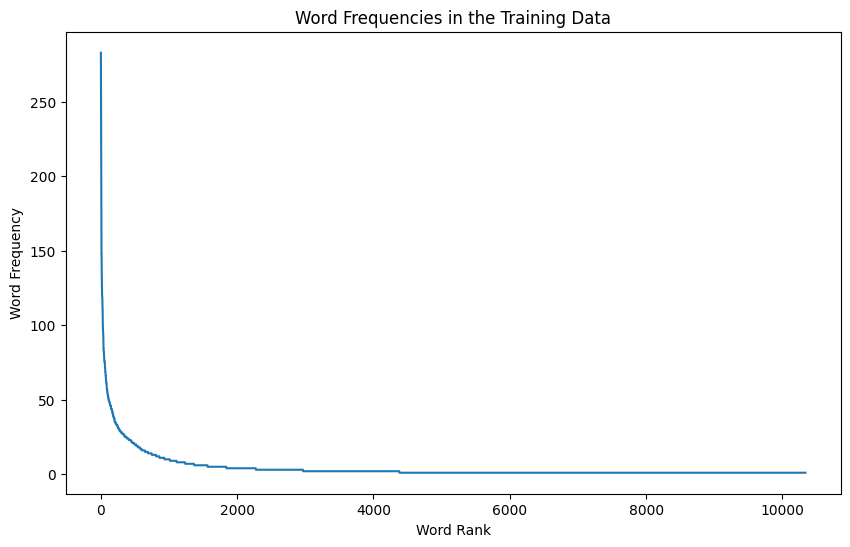

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# visualize word frequencies to help choose M
vectorizer = CountVectorizer(binary=False)  # Here, we're not setting binary=True to get actual counts
X_train_counts = vectorizer.fit_transform(train['text'])

# Sum up the counts of each vocabulary word
word_freq = X_train_counts.sum(axis=0)
word_freq = np.array(word_freq).reshape(-1)

# Sort word frequencies
sorted_word_freq = np.sort(word_freq)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sorted_word_freq)
plt.xlabel('Word Rank')
plt.ylabel('Word Frequency')
plt.title('Word Frequencies in the Training Data')
plt.show()

# choose M=10:
M = 10  # consider words that appear in at least 10 different tweets.


To decide an appropriate threshold M, I visualized the word frequencies and chose M=10 where I found a sharp drop in the frequencies.

Then, I built the bag of words feature vectors for both the training and
development sets, and there are in total 981 features in these vectors.


In [16]:
# Given the threshold M=10, let's build the BoW representation

vectorizer = CountVectorizer(binary=True, min_df=M)
X_train_bow = vectorizer.fit_transform(train['text'])
X_dev_bow = vectorizer.transform(dev['text'])

# Report the number of features
num_features = X_train_bow.shape[1]
num_features


981

## (e) Logistic regression

(i) Logistic Regression without Regularization:
Train a logistic regression model without regularization.
Report the F1 score on the training and development sets.
Comment on whether you observe any issues with overfitting or underfitting.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

train_target = train['target']
dev_target = dev['target']


# Train a logistic regression model without regularization
lr_no_reg = LogisticRegression(penalty='none', max_iter=1000, random_state=42)
lr_no_reg.fit(X_train_bow, train_target)

# Predict on training and development sets
train_preds_no_reg = lr_no_reg.predict(X_train_bow)
dev_preds_no_reg = lr_no_reg.predict(X_dev_bow)

# Calculate F1 scores
f1_train_no_reg = f1_score(train_target, train_preds_no_reg).round(4)
f1_dev_no_reg = f1_score(dev_target, dev_preds_no_reg).round(4)


print(f"F1 score on training set (no regularization): {f1_train_no_reg}")
print(f"F1 score on development set (no regularization): {f1_dev_no_reg}")


F1 score on training set (no regularization): 0.848
F1 score on development set (no regularization): 0.7217


Since F1 score on training set is higher than that of the development set, there may be issues of overfitting here.

(ii) Logistic Regression with L1 Regularization:
Train a logistic regression model with L1 regularization.
Report the performance on both the training and the development sets.

In [18]:
# Train a logistic regression model with L1 regularization
lr_l1_reg = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, random_state=42)
lr_l1_reg.fit(X_train_bow, train_target)

# Predict on training and development sets
train_preds_l1_reg = lr_l1_reg.predict(X_train_bow)
dev_preds_l1_reg = lr_l1_reg.predict(X_dev_bow)

# Calculate F1 scores
f1_train_l1_reg = f1_score(train_target, train_preds_l1_reg).round(4)
f1_dev_l1_reg = f1_score(dev_target, dev_preds_l1_reg).round(4)

print(f"F1 score on training set (L1 regularization): {f1_train_l1_reg}")
print(f"F1 score on development set (L1 regularization): {f1_dev_l1_reg}")


F1 score on training set (L1 regularization): 0.8234
F1 score on development set (L1 regularization): 0.7203


Comparing these two F1 scores, there might be the issue of overfitting.

(iii) Logistic Regression with L2 Regularization:
Train a logistic regression model with L2 regularization.
Report the performance on both the training and the development sets.

In [19]:
# Train a logistic regression model with L2 regularization
lr_l2_reg = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)
lr_l2_reg.fit(X_train_bow, train_target)

# Predict on training and development sets
train_preds_l2_reg = lr_l2_reg.predict(X_train_bow)
dev_preds_l2_reg = lr_l2_reg.predict(X_dev_bow)

# Calculate F1 scores
f1_train_l2_reg = f1_score(train_target, train_preds_l2_reg).round(4)
f1_dev_l2_reg = f1_score(dev_target, dev_preds_l2_reg).round(4)

print(f"F1 score on training set (L2 regularization): {f1_train_l2_reg}")
print(f"F1 score on development set (L2 regularization): {f1_dev_l2_reg}")

F1 score on training set (L2 regularization): 0.832
F1 score on development set (L2 regularization): 0.7236


Similarly, there may be the problem of overfitting here. 

iv. Which one of the three classifiers performed the best on your training and development
set? Did you observe any overfitting and did regularization help reduce it? Support your
answers with the classifier performance you got.



### 1. Performance on Training Data:
- **No regularization**: 0.8480
- **L1 regularization**: 0.8234
- **L2 regularization**: 0.8320

The model without regularization has the highest F1 score on the training data, suggesting it has fit the training data most closely. However, a high score on training data doesn't always mean better generalization to new data. But instead, may be a result of overfitting.

### 2. Performance on Development Data:
- **No regularization**: 0.7217
- **L1 regularization**: 0.7203
- **L2 regularization**: 0.7236

The model with L2 regularization performs the best on the development data, followed by the no regularization model. The L1 regularization model has the lowest F1 score on the development set.


### 3. Overfitting Observations:
- **No regularization**: The difference between training and development F1 scores is 0.8480−0.7217=0.1263
- **L1 regularization**: The difference is 0.8234−0.7203=0.1031
- **L2 regularization**: The difference is 0.8320−0.7236=0.1084 

The model without regularization has the largest gap between training and development performance, suggesting it's overfitting more than the regularized models. Both L1 and L2 regularization reduced the gap, indicating they help in controlling overfitting.

### 4. Conclusion:
- The **L2 regularized model** performed the best on the development set, making it the best choice among the three for this particular dataset. 
- Regularization clearly helped in reducing overfitting. This is evident from the reduced gap between training and development scores for the regularized models compared to the non-regularized model.
- The fact that both regularized models outperformed the non-regularized model on the development set further emphasizes the importance of regularization in improving generalization to new data.

In summary, among the three models, the L2 regularized logistic regression is the most suitable for this task as it provides the best balance between fitting the training data and generalizing to new data.

v. Inspect the weight vector of the classifier with L1 regularization (in other words, look at
the θ you got after training). You can access the weight vector of the trained model using
the coef_ attribute of a LogisticRegression instance. What are the most important words
for deciding whether a tweet is about a real disaster or not?

In [20]:
# Get the coefficients
coefficients = lr_l1_reg.coef_[0]

# Pair words with their coefficients
word_coeff_pairs = list(zip(vectorizer.get_feature_names_out(), coefficients))

# Sort by absolute value of coefficients in descending order
sorted_word_coeff_pairs = sorted(word_coeff_pairs, key=lambda x: abs(x[1]), reverse=True)

# Display the top 20 words indicating real disasters and their coefficients
top20_positive_words = [pair for pair in sorted_word_coeff_pairs if pair[1] > 0][:20]

print("Top 20 words indicating real disasters:", top20_positive_words)

# only get the top 20 words without the coefficients:
# top20_positive_wordsonly = [pair[0] for pair in sorted_word_coeff_pairs if pair[1] > 0][:20]


Top 20 words indicating real disasters: [('typhoon', 3.8431529530210553), ('hiroshima', 3.5187245032067977), ('debris', 3.3290397204141864), ('casualties', 3.2281029402316586), ('swallow', 3.2245389856519244), ('derailment', 3.1136163812710227), ('fires', 2.897545619297425), ('ebola', 2.8915583885504184), ('earthquake', 2.8780040609292903), ('bioterrorism', 2.8597057842839395), ('wildfire', 2.7788651744862425), ('heavy', 2.7596605143962663), ('israeli', 2.655097112383884), ('outbreak', 2.585900774988136), ('mh', 2.5649946829354566), ('threaten', 2.4208635525336524), ('spill', 2.368031705343624), ('migrants', 2.363214951882623), ('investigators', 2.24645562130144), ('myanmar', 2.1657313528714797)]


In [21]:
# only get the top 20 words without the coefficients:
top20_positive_wordsonly = [pair[0] for pair in sorted_word_coeff_pairs if pair[1] > 0][:20]

print("Top 20 words indicating real disasters:", top20_positive_wordsonly)

Top 20 words indicating real disasters: ['typhoon', 'hiroshima', 'debris', 'casualties', 'swallow', 'derailment', 'fires', 'ebola', 'earthquake', 'bioterrorism', 'wildfire', 'heavy', 'israeli', 'outbreak', 'mh', 'threaten', 'spill', 'migrants', 'investigators', 'myanmar']


The top 20 most important words for deciding whether a tweet is about a real disaster or not include: 

'typhoon', 'hiroshima', 'debris', 'casualties', 'swallow', 'derailment', 'fires', 'ebola', 'earthquake', 'bioterrorism', 'wildfire', 'heavy', 'israeli', 'outbreak', 'mh', 'threaten', 'spill', 'migrants', 'investigators', 'myanmar'

Based on human knowledge and common sense, these words all seem quite relevant for predicting whether a tweet is about a real disaster.

## (f) Bernoulli Naive Bayes

In [22]:
import numpy as np

# Feature extraction
count_vect = CountVectorizer(binary=True, max_features=1000)
X_train_bow = count_vect.fit_transform(train['text']).toarray()
y_train = train_target

X_dev_bow = count_vect.transform(dev['text']).toarray()

# Compute the model parameters
n = X_train_bow.shape[0]
d = X_train_bow.shape[1]
K = len(np.unique(y_train))

psis = np.zeros([K,d])
phis = np.zeros([K])

for k in range(K):
    X_k = X_train_bow[y_train == k]
    
    # Using Laplace smoothing
    psis[k] = (np.sum(X_k, axis=0) + 1) / (X_k.shape[0] + 2)
    phis[k] = X_k.shape[0] / float(n)

# Predict using the model
def nb_predictions(x, psis, phis):
    n, d = x.shape
    x = np.reshape(x, (1, n, d))
    psis = np.reshape(psis, (K, 1, d))
    
    psis = psis.clip(1e-14, 1-1e-14)
    
    logpy = np.log(phis).reshape([K,1])
    logpxy = x * np.log(psis) + (1-x) * np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy

    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

# Predict on the training set
idx_train, _ = nb_predictions(X_train_bow, psis, phis)

# Predict on the development set
X_dev_bow = count_vect.transform(dev['text']).toarray()
idx_dev, _ = nb_predictions(X_dev_bow, psis, phis)

# Step 4: Evaluate Performance
f1_train = f1_score(y_train, idx_train).round(4)
f1_dev = f1_score(dev_target, idx_dev).round(4)

print(f"F1 score on training set (bow, Bernoulli Naive Bayes): {f1_train}")
print(f"F1 score on development set (bow, Bernoulli Naive Bayes): {f1_dev}")


F1 score on training set (bow, Bernoulli Naive Bayes): 0.7771
F1 score on development set (bow, Bernoulli Naive Bayes): 0.715


The Bernoulli Naive Bayes classifier has an F1 score of 0.715 on the development set. This indicates a good but slightly reduced performance compared to the training set (F1 score on training set is 0.7771).

The difference in the F1 scores between the training and development sets suggests that there might be a small amount of overfitting; however, the classifier still generalizes reasonably well to the development data.

## (g) Model comparison 

• Which model performed the best in predicting whether a tweet is of a real disaster or not? Include your performance metric in your response. Comment on the pros and cons of using generative vs discriminative models.


Logistic Regression with L2 regularization performed slightly better on the development set compared to the Bernoulli Naive Bayes classifier. Logistic Regression (L2 regularization) had an F1 score of 0.7236 on the development set and Bernoulli Naive Bayes had an F1 score of 0.715 on the development set. 

**Generative vs discriminative models**:

Generative models (like Naive Bayes): 

- **Pros:** 
  - Can generate new samples similar to the input data.
  - Typically have fewer parameters and can be more robust in situations with limited data.
  - Can handle missing data more gracefully.
- **Cons:** 
  - They make stronger assumptions about data distribution, which might not always hold.
  - Might not always achieve the same level of accuracy as discriminative models.



Discriminative Models (like Logistic Regression):
- **Pros:** 
  - Often yield better performance because they focus on modeling the decision boundary between classes.
  - Make fewer assumptions about the data distribution.
- **Cons:** 
  - Can't generate new samples from the input data.
  - Might require more data to train effectively compared to generative models.


In conclusion, while both models have their strengths and weaknesses, their performance can vary depending on the specific dataset and task. It's always beneficial to experiment with multiple models and choose the one that performs best for a given application.

• Think about the assumptions that Naive Bayes makes. How are the assumptions different from logistic regressions? Discuss whether it’s valid and efficient to use Bernoulli Naive Bayes classifier for natural language texts.

#### Assumptions:

**Naive Bayes:**
- Assumes that features are conditionally independent given the class label. This is a strong assumption, especially for text data where words often have dependencies.
- Assumes the form of the input distribution. For Bernoulli Naive Bayes, it assumes binary input features.

**Logistic Regression:**
- Assumes a linear decision boundary, but doesn't assume independence of features.
- Assumes that the log-odds of the dependent variable is a linear combination of the independent variables.

#### Validity of Bernoulli Naive Bayes for Natural Language Texts:

Bernoulli Naive Bayes is specifically designed for binary/boolean features, making it suitable for text data where the presence or absence of a word is a feature (like in a Bag of Words model). However, the assumption of feature independence can be problematic for text data because word dependencies often carry important meaning.


## (h) N-gram model

Discuss how you chose the threshold M, and report the total number of 2-grams in your vocabulary. In addition, take 10 2-grams from your vocabulary, and print them out.

In [23]:
# Using CountVectorizer to extract 2-grams
vectorizer_2gram = CountVectorizer(ngram_range=(2, 2), binary=True)
X_train_2gram = vectorizer_2gram.fit_transform(train['text'])
X_dev_2gram = vectorizer_2gram.transform(dev['text'])

# Shape of the 2-gram feature matrix
X_train_2gram.shape

(5329, 31780)

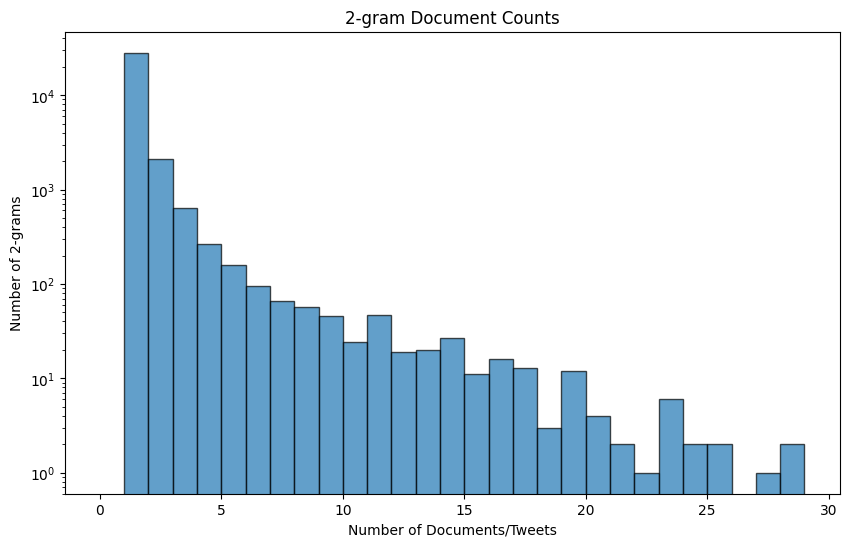

In [24]:
# Count the number of documents/tweets that each 2-gram appears in
document_counts = np.sum(X_train_2gram.toarray(), axis=0)

# Plot histogram for 2-gram document counts
plt.figure(figsize=(10,6))
plt.hist(document_counts, bins=range(30), edgecolor='k', alpha=0.7)
plt.yscale('log', nonpositive='clip')
plt.title('2-gram Document Counts')
plt.xlabel('Number of Documents/Tweets')
plt.ylabel('Number of 2-grams')
plt.show()


To determine the threshold M based on the visualization, I look for a point on the x-axis where there's a noticeable decline in the frequency of 2-grams. So I pick M = 3 in this case. 


In [25]:
# Assuming you've used CountVectorizer and stored the result in 'X_train_2gram'
vectorizer_2gram = CountVectorizer(ngram_range=(2,2), min_df=3)
X_train_2gram = vectorizer_2gram.fit_transform(train['text'])

# Extracting 2-grams
feature_names = vectorizer_2gram.get_feature_names_out()

# Printing 10 of them
print(feature_names[:10])


['aba woman' 'abandon aircraft' 'abbswinston zionist' 'abc news'
 'abcnews obama' 'access secrets' 'accident experts' 'accident man'
 'accident property' 'accidents indian']


In [26]:

# Create the CountVectorizer instance with the desired parameters
vectorizer_2gram = CountVectorizer(ngram_range=(2,2), min_df=3)

# Fit the vectorizer on your training texts
vectorizer_2gram.fit(train['text'])

# Retrieve the feature names (2-grams in this case)
feature_names = vectorizer_2gram.get_feature_names_out()

# Get the total number of 2-grams in the vocabulary
total_2grams = len(feature_names)
print("The total number of 2-grams in the vocabulary is:", total_2grams)

The total number of 2-grams in the vocabulary is: 1547


#### Logistic Regression on 2-grams:

In [27]:
## Logistic Regression on 2-grams

# Transform the training and development sets using the 2-gram vectorizer
X_train_2gram = vectorizer_2gram.transform(train['text'])
X_dev_2gram = vectorizer_2gram.transform(dev['text'])


# Train a logistic regression model
logreg_2gram = LogisticRegression(max_iter=1000)
logreg_2gram.fit(X_train_2gram, train_target)

# Predict and compute F1 scores
train_pred_2gram = logreg_2gram.predict(X_train_2gram)
dev_pred_2gram = logreg_2gram.predict(X_dev_2gram)

f1_train_2gram = f1_score(train_target, train_pred_2gram).round(4)
f1_dev_2gram = f1_score(dev_target, dev_pred_2gram).round(4)

print("F1 score on training set (2-grams) Logistic Regression:", f1_train_2gram)
print("F1 score on development set (2-grams) Logistic Regression:", f1_dev_2gram)


F1 score on training set (2-grams) Logistic Regression: 0.6575
F1 score on development set (2-grams) Logistic Regression: 0.5671


#### Bernoulli Naive Bayes on 2-grams

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score

# Feature extraction with 2-grams
count_vect_2gram = CountVectorizer(binary=True, max_features=1000, ngram_range=(2, 2))
X_train_2gram = count_vect_2gram.fit_transform(train['text']).toarray()
X_dev_2gram = count_vect_2gram.transform(dev['text']).toarray()

# Compute the model parameters for 2-grams
n = X_train_2gram.shape[0]
d = X_train_2gram.shape[1]
K = len(np.unique(y_train))

psis_2gram = np.zeros([K, d])
phis_2gram = np.zeros([K])

for k in range(K):
    X_k = X_train_2gram[y_train == k]
    
    # Using Laplace smoothing
    psis_2gram[k] = (np.sum(X_k, axis=0) + 1) / (X_k.shape[0] + 2)
    phis_2gram[k] = X_k.shape[0] / float(n)

# Predict using the model for 2-grams
idx_train_2gram, _ = nb_predictions(X_train_2gram, psis_2gram, phis_2gram)

# Predict on the development set for 2-grams
idx_dev_2gram, _ = nb_predictions(X_dev_2gram, psis_2gram, phis_2gram)

# Evaluate Performance for 2-grams
f1_train_2gram = f1_score(y_train, idx_train_2gram).round(4)
f1_dev_2gram = f1_score(dev_target, idx_dev_2gram).round(4)

print(f"F1 score on training set (2-grams) Bernoulli Naive Bayes: {f1_train_2gram}")
print(f"F1 score on development set (2-grams) Bernoulli Naive Bayes: {f1_dev_2gram}")


F1 score on training set (2-grams) Bernoulli Naive Bayes: 0.5672
F1 score on development set (2-grams) Bernoulli Naive Bayes: 0.5027


Report your results on training and development set. Do these results differ significantly from those using the bag of words model? Discuss what this implies about the task.


**Bag of Words Model**:
1. **Logistic Regression (L2 regularization)**:
   - F1 score on training set: 0.8320
   - F1 score on development set: 0.7236
2. **Bernoulli Naive Bayes**:
   - F1 score on training set: 0.7771
   - F1 score on development set: 0.7150

**2-gram Model**:
1. **Logistic Regression (L2 regularization)**:
   - F1 score on training set: 0.6575
   - F1 score on development set: 0.5671
2. **Bernoulli Naive Bayes**:
   - F1 score on training set: 0.5672
   - F1 score on development set: 0.5027

**Interpretation**:
The performance of both classifiers drops significantly when using the 2-gram model compared with the Bag of Words model. The drop in performance using Bernoulli Naive Bayes is much more drastic compared to the Bag of Words model. Logistic Regression does better than Bernoulli Naive Bayes with the 2-gram model but still performs worse than its Bag of Words counterpart.

**Implications**:

1. This suggests that the addition of bigrams might have introduced noise into the model or that the dataset's nature is such that individual keywords are more indicative of the target class than word pairs.

2. The more significant performance drop of Bernoulli Naive Bayes compared to Logistic Regression suggests that Logistic Regression might be more robust to changes in feature representation, at least in the context of this task. Bernoulli Naive Bayes assumes binary features and might be more sensitive to the increased sparsity and reduced frequency of individual 2-grams.

3. For the given dataset, individual keywords might be more important than the context provided by word pairs (2-grams). Although the 2-gram model captures more contextual information, it doesn't necessarily lead to better performance for this specific task.


(i) Determine performance with the test set:

Re-build your feature vectors and re-train your preferred classifier (either bag of word or n-gram using either logistic regression or Bernoulli naive bayes) using the entire Kaggle training data (i.e. using all of the data in both the training and development sets). Then, test it on the Kaggle test data. Submit your results to Kaggle, and report the resulting F1-score on the test data, as reported by Kaggle. Was this lower or higher than you expected? Discuss why it might be lower or higher than your expectation.

The Bag of Words model with Logistic Regression (L2 regularization) has the highest F1-score on the development set. Thus, I will use this classifier for the final model.

In [29]:
# rebuild the training and development sets with the original text column:
combined_data = pd.concat([train, dev])
combined_target = pd.concat([train_target, dev_target])


In [30]:
# preprocessing the test data:
test_data['text'] = test_data['text'].apply(lowercase)
test_data['text'] = test_data['text'].apply(lemmatize_text)
test_data['text'] = test_data['text'].apply(remove_urls_and_mentions)
test_data['text'] = test_data['text'].apply(strip_punctuation)
test_data['text'] = test_data['text'].apply(remove_stopwords) 


#test_data['text'] = test_data['text'].apply(tokenize_text)

# keep only the text and id column in test_data

test_data = test_data[['text','id']]
test_data.head()


,text,id
0,happen terrible car crash,0
1,hear earthquake different cities stay safe eve...,2
2,forest fire spot pond geese flee across street...,3
3,apocalypse lighting spokane wildfires,9
4,typhoon soudelor kill china taiwan,11


In [31]:
# The Bag of Words model
count_vect = CountVectorizer(binary=True)
X_combined = count_vect.fit_transform(combined_data['text']).toarray()

# train a Logistic Regression model with L2 regularization on the combined dataset:
clf = LogisticRegression(penalty='l2', max_iter=1000)
clf.fit(X_combined, combined_target)

X_test = count_vect.transform(test_data['text']).toarray()
predictions = clf.predict(X_test)

submission = pd.DataFrame({'id': test_data['id'], 'target': predictions})
submission.to_csv('submission.csv', index=False)

Submit your results to Kaggle and report the resulting F1-score on the test data, as reported by Kaggle. Was this lower or higher than you expected? Discuss why it might be lower or higher than your expectation

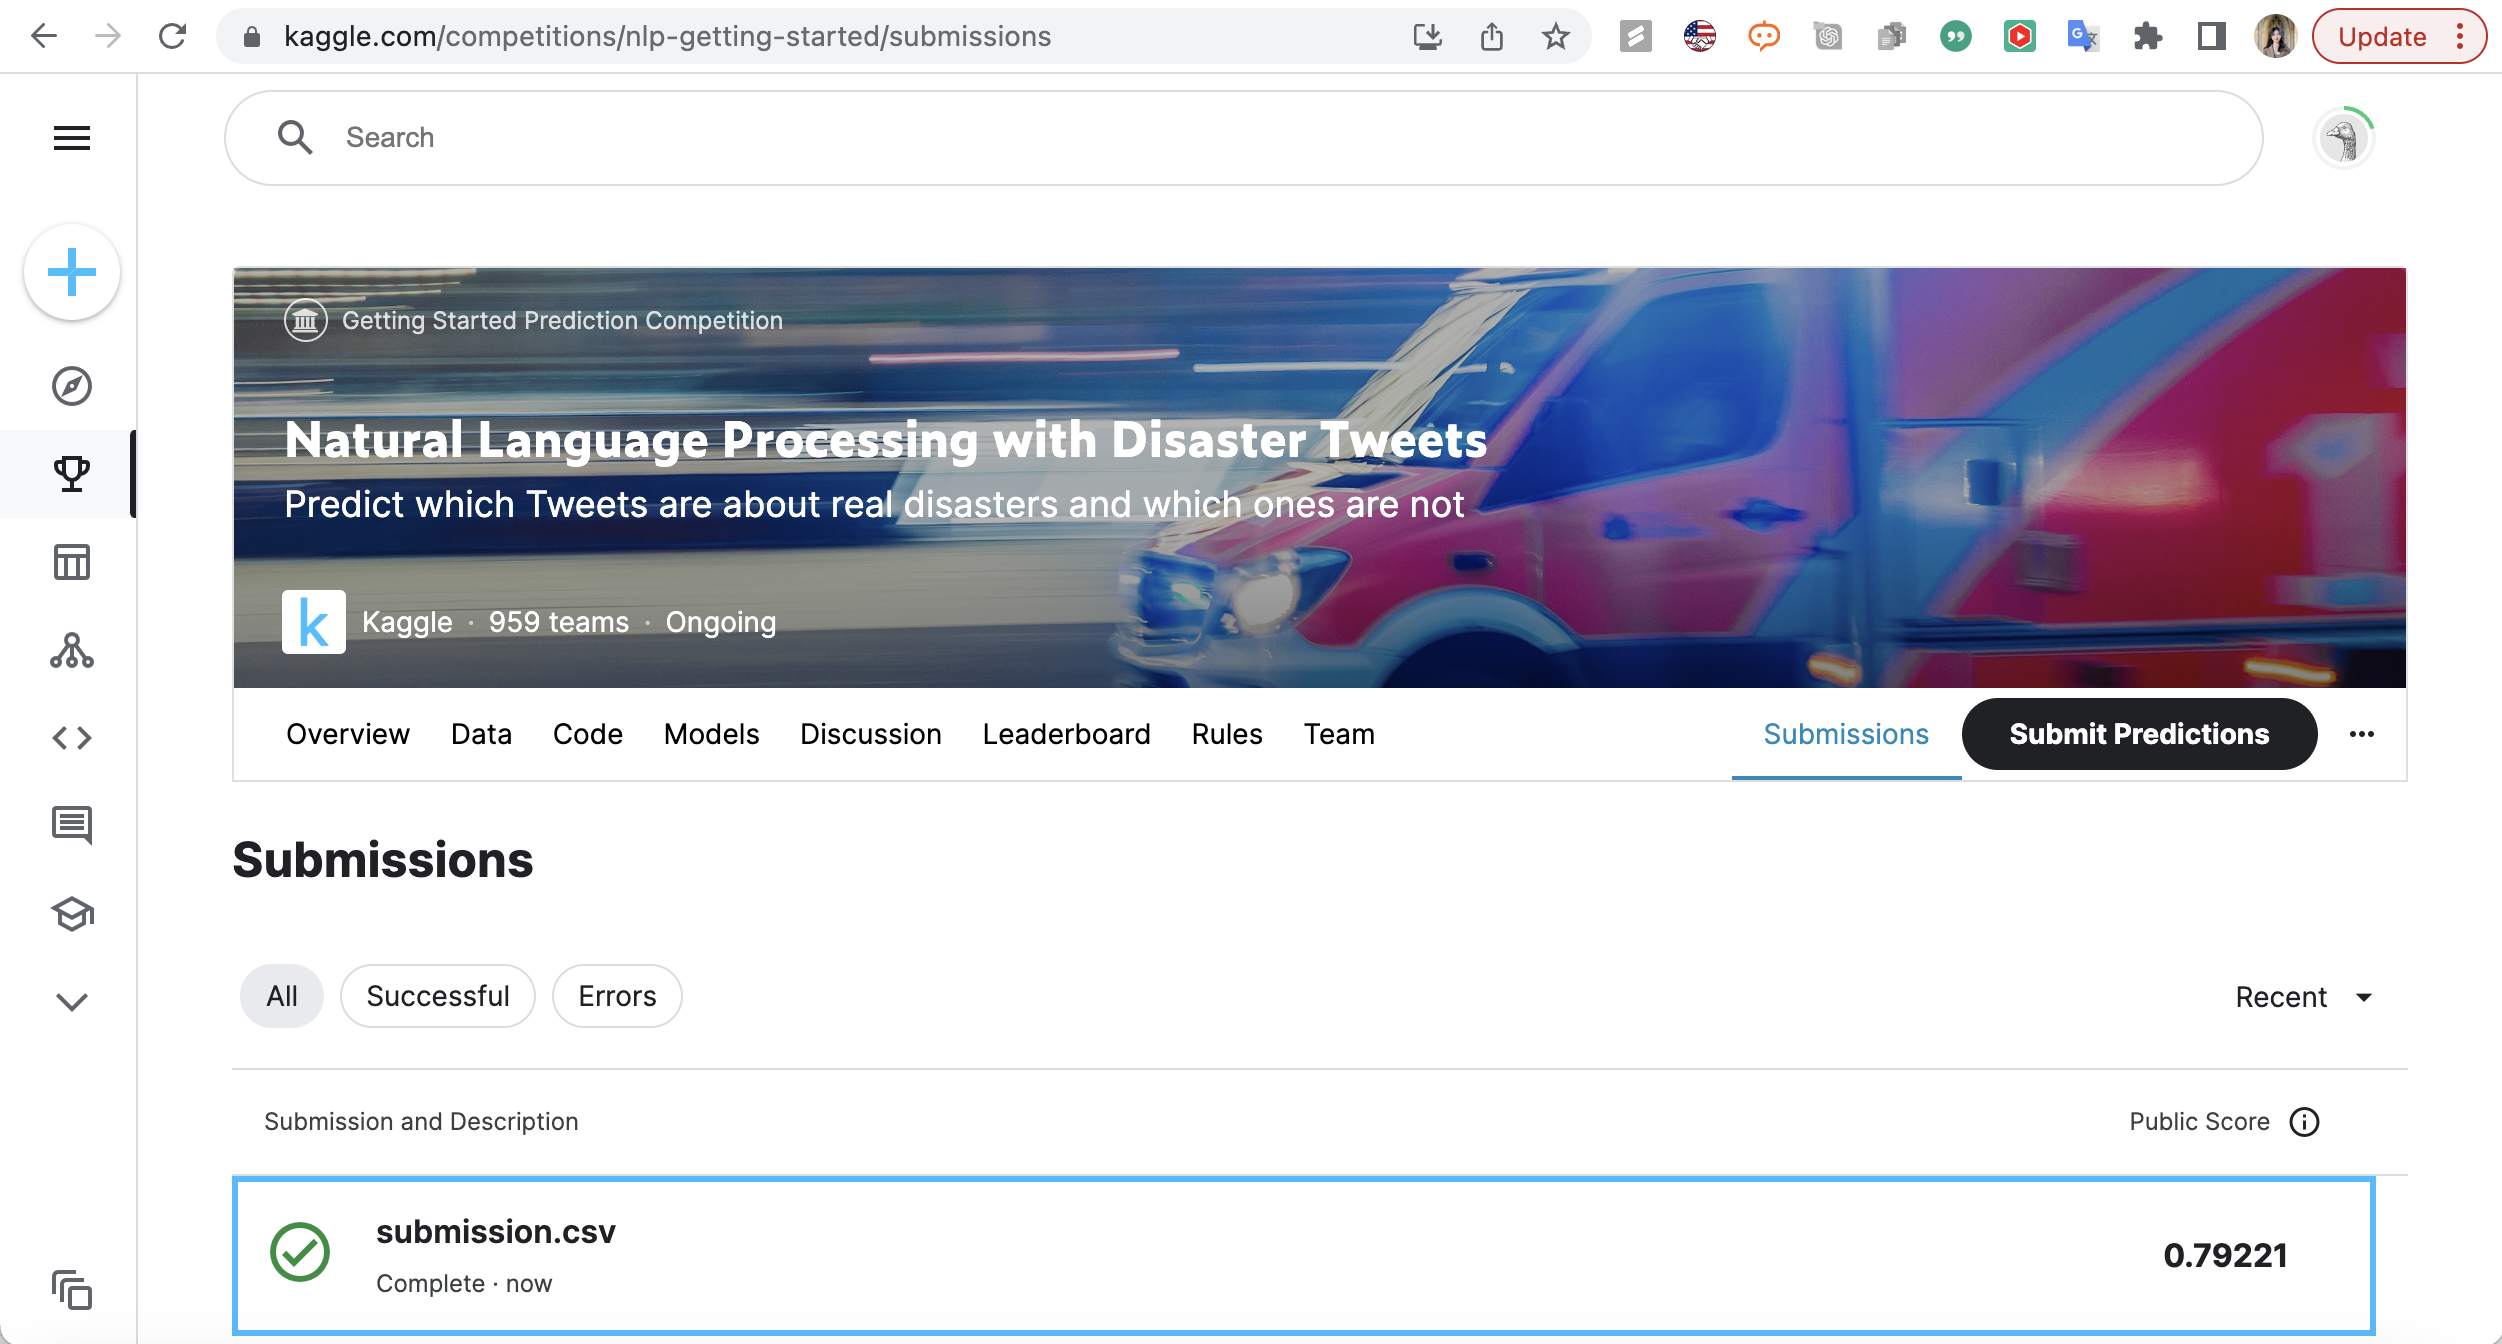

In [32]:
# insert an image:
from IPython.display import Image
Image(filename='kaggle_score.png',height= 400)


On Kaggle, it shows that the F1-score on the test data is 0.79221, which is higher than expected (comparing to the F1 score on the development set). 

Possible Explanations:

1. The test data on Kaggle might have examples that are more "typical" or "central" to the distribution of the training data. If the development set had more challenging or outlier cases, it might explain why the model performed better on the test set.

2. If the Kaggle test set is larger than the development set, the law of large numbers might come into play. A larger test set might better represent the underlying distribution, leading to a more "average" performance.

3. Since I've used regularization, my model might be more robust and generalize better to unseen data, leading to performance that's better than expected based on development set results.
